In [1]:
from ortools.constraint_solver import pywrapcp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def main(N=8):
    # We create our solver.
    solver = pywrapcp.Solver("N-queens")

    # We should now declare our queens' coordinates as variables.
    # We want our variables to be in range of 0..N.
    # For that we are going to use solver.IntVar.
    # Lets create and name them q0, q1 .. q(N-1) since we have N queens.
    queens = [solver.IntVar(0, N - 1, "q%i" % i) for i in range(N)]

    # Time to add our constraints to our solver.
    # We have 2 constraints. We have to ensure that no two queens are:
    #  1- On the same column: No two values of the array can be the same.
    #  2- On the same diagonal: The values plus(and minus) the indices should be all different.
    # "solver.AllDifferent" enforces a set of variables to take distinct values
    solver.Add(solver.AllDifferent(queens))
    solver.Add(solver.AllDifferent([queens[i] + i for i in range(N)]))
    solver.Add(solver.AllDifferent([queens[i] - i for i in range(N)]))

    # Using the "solver.Phase", we tell the solver what to solve.
    tree = solver.Phase(queens,
                        solver.INT_VAR_SIMPLE,
                        solver.INT_VALUE_SIMPLE)

    # After creating the search tree we can now begin our search
    solver.NewSearch(tree)
    solution_count = 0
    
    # We can print our solutions while iterating over them as:
    while solver.NextSolution():
        solution_count += 1
        solution = [queens[i].Value() for i in range(N)]
        print ("Solution %d:" % solution_count, solution)
        df = pd.DataFrame(np.zeros((len(solution),len(solution)), dtype=int))
        for i in range(len(solution)):
            df.iloc[i,solution[i]] = '*'
        print(df)
        
       
    d[N]=solution_count
    print(d)

    # We have reached the end of our search
    # Documentation says:
    # It is just better practice to finish the search with the method EndSearch
    solver.EndSearch()

In [3]:
d={} 
main(N=4)

Solution 1: [1, 3, 0, 2]
   0  1  2  3
0  0  *  0  0
1  0  0  0  *
2  *  0  0  0
3  0  0  *  0
Solution 2: [2, 0, 3, 1]
   0  1  2  3
0  0  0  *  0
1  *  0  0  0
2  0  0  0  *
3  0  *  0  0
{4: 2}


In [4]:
def main(N=8):
    # We create our solver.
    solver = pywrapcp.Solver("N-queens")
    
    queens = [solver.IntVar(0, N - 1, "q%i" % i) for i in range(N)]


    solver.Add(solver.AllDifferent(queens))
    solver.Add(solver.AllDifferent([queens[i] + i for i in range(N)]))
    solver.Add(solver.AllDifferent([queens[i] - i for i in range(N)]))

    tree = solver.Phase(queens,
                        solver.INT_VAR_SIMPLE,
                        solver.INT_VALUE_SIMPLE)
    
    solver.NewSearch(tree)
    solution_count = 0
    
   
    while solver.NextSolution():
        solution_count += 1
        solution = [queens[i].Value() for i in range(N)]
          
    d[N]=solution_count

    # We have reached the end of our search
    # Documentation says:
    # It is just better practice to finish the search with the method EndSearch
    solver.EndSearch()
    
    return d

In [5]:
d={}
for i in range(4,11):
    d=main(N=i)

In [6]:
d

{4: 2, 5: 10, 6: 4, 7: 40, 8: 92, 9: 352, 10: 724}

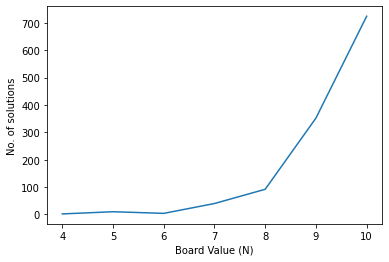

In [7]:
plt.plot(d.keys(),d.values())
plt.xlabel('Board Value (N)')
plt.ylabel('No. of solutions')
plt.show()

In [ ]:
# Compare results. What is the exponential growth?

# I believe the question is asking to calculate the percentage change in the number of solutions from 4 to 8.
# percentage change = ((new-old)/old)*100 = ((92-2)/2)*100 = 4500%

# Note: If the growth rate was constant throughout, we could have calculated the exponential growth rate using formula:  new = old * (1 + r)^t

In [ ]:
# Q. Is there a large difference? Why?

# A. Yes, there is a large difference because no. of permutations to place queens without breaking the 3 constraints increases from 4*4 to 8*8 grid.